Average playtime by genre:
genre
Simulation                   2129.109792
Massively Multiplayer        1749.969945
RPG                          1653.708480
Early Access                 1639.679175
Action                       1614.793569
                             1555.929036
Strategy                     1278.054864
Indie                        1190.023889
Free to Play                 1137.357368
Adventure                    1135.304182
Web Publishing               1091.289246
Audio Production             1027.730129
Racing                        954.183906
Sports                        845.912042
Design &amp; Illustration     780.490487
Utilities                     760.782883
Casual                        759.881706
Video Production              723.608291
Software Training             619.340564
Animation &amp; Modeling      458.927069
Photo Editing                 348.716012
Education                     311.277903
Name: playtime_forever, dtype: float64


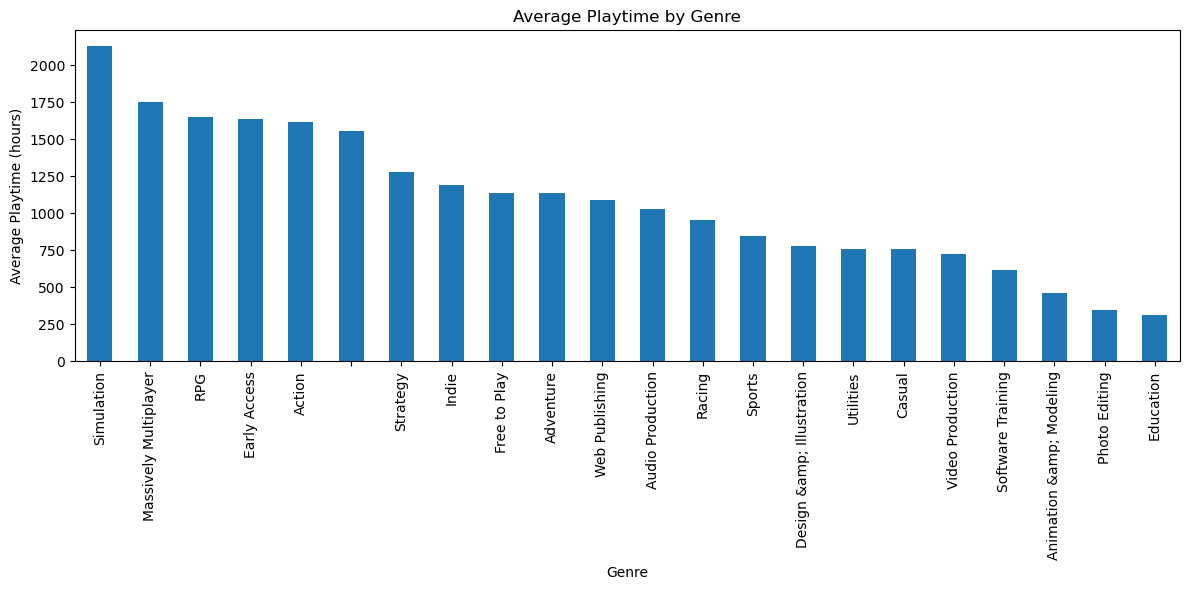


Playtime behavior by recent play:
recent_play
False    1201.712532
True     9587.768713
Name: playtime_forever, dtype: float64


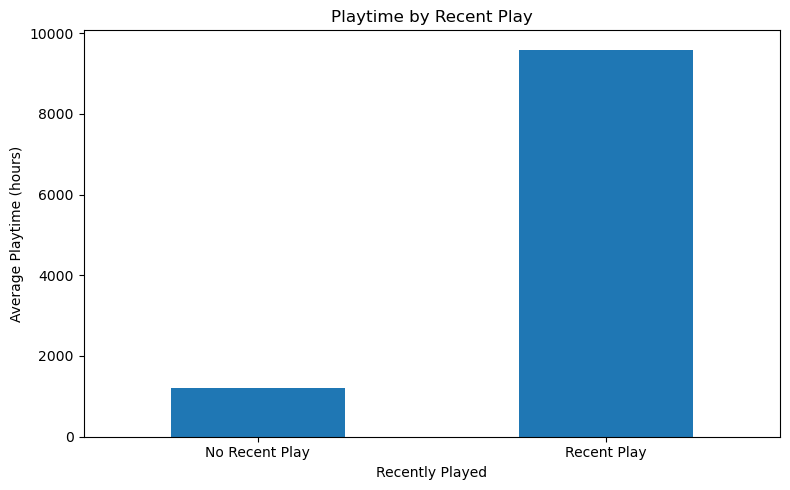

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "enriched_australian_users_items.csv"  
df = pd.read_csv(file_path)

df = df[df['playtime_forever'] > 0]

df['genre'] = df['genre'].fillna('') 
genre_expanded = df.drop('genre', axis=1).join(
    df['genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
)

genre_playtime = genre_expanded.groupby('genre')['playtime_forever'].mean().sort_values(ascending=False)

print("Average playtime by genre:")
print(genre_playtime)

plt.figure(figsize=(12, 6))
genre_playtime.plot(kind='bar', title='Average Playtime by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Playtime (hours)')
plt.tight_layout()
plt.show()

if 'playtime_2weeks' in df.columns and not df['playtime_2weeks'].isnull().all():
    df['recent_play'] = df['playtime_2weeks'] > 0
    purchase_behavior = df.groupby('recent_play')['playtime_forever'].mean()

    print("\nPlaytime behavior by recent play:")
    print(purchase_behavior)

    plt.figure(figsize=(8, 5))
    purchase_behavior.plot(kind='bar', title='Playtime by Recent Play')
    plt.xlabel('Recently Played')
    plt.ylabel('Average Playtime (hours)')
    plt.xticks(ticks=[0, 1], labels=['No Recent Play', 'Recent Play'], rotation=0)
    plt.tight_layout()
    plt.show()

if 'purchase' in df.columns and not df['purchase'].isnull().all():
    recommendation_rate = genre_expanded.groupby('genre')['purchase'].mean().sort_values(ascending=False)

    print("\nRecommendation rate by genre:")
    print(recommendation_rate)

    plt.figure(figsize=(12, 6))
    recommendation_rate.plot(kind='bar', title='Recommendation Rate by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Recommendation Rate')
    plt.tight_layout()
    plt.show()


